# Cropping images
The `crop` widget allows cropping a 2D or 3D image.

In [1]:
import stackview

from skimage.io import imread
import numpy as np

In [2]:
image = imread("data/CalibZAPWfixed_000154_max.tif")

The widget contains of 2 or 3 sliders, for 2D and 3D images respectively. It also supports `stackview`'s typical parameters such as `continuous_update`, 'zoom_factor', etc.

In [3]:
image_2d = image[0]

crop_widget_2d = stackview.crop(image_2d, continuous_update=True)
crop_widget_2d

_Cropper(children=(IntRangeSlider(value=(0, 235), description='Y', max=235), IntRangeSlider(value=(0, 389), de…

In [4]:
crop_widget = stackview.crop(image, 
                             continuous_update=True, 
                             zoom_factor=0.75)
crop_widget

_Cropper(children=(IntRangeSlider(value=(0, 100), description='Z'), IntRangeSlider(value=(0, 235), description…

## Configuring and reading the cropped region
You can change the range sliders programmatically.

In [5]:
crop_widget = stackview.crop(image, continuous_update=True, zoom_factor=2)
crop_widget.range = (slice(0, 40), slice(40, 80), slice(80, 120))
crop_widget

_Cropper(children=(IntRangeSlider(value=(0, 40), description='Z'), IntRangeSlider(value=(40, 80), description=…

You can retrieve the cropped range like this.

In [6]:
r = crop_widget.range
r

(slice(0, 40, 1), slice(40, 80, 1), slice(80, 120, 1))

It technically is a tuple of Python `slice`s.

In [7]:
r[0].start, r[0].stop

(0, 40)

## Cropping images
You can use this range to crop the image...

In [8]:
r = crop_widget.range
image[r].shape

(40, 40, 40)

... or retrieve the cropped image directly.

In [9]:
cropped_image = crop_widget.crop()
cropped_image.shape

(40, 40, 40)

This `cropped_image` object uses `stackview`'s `insight` under the hood and thus, comes with a nice view.

StackViewNDArray([[[ 30,  48,  35, ...,  33,  37,  48],
                   [ 18,  24,  33, ...,  50,  41,  43],
                   [ 37,  36,  37, ...,  40,  37,  45],
                   ...,
                   [ 61,  48,  48, ...,  54,  74,  68],
                   [ 66,  40,  35, ...,  66,  70,  78],
                   [ 26,  18,  31, ...,  98,  79,  43]],

                  [[ 28,  10,  18, ...,  25,  32,  39],
                   [ 18,  17,  29, ...,  65,  40,  32],
                   [ 20,  19,  30, ...,  24,  17,  21],
                   ...,
                   [ 41,  68,  80, ...,  53,  56,  61],
                   [ 20,  50,  91, ...,  47,  61,  65],
                   [ 43,  12,  14, ...,  75,  80, 100]],

                  [[ 27,  25,  29, ...,  44,  42,  41],
                   [ 41,  48,  49, ...,  61,  45,  60],
                   [ 49,  38,  20, ...,  56,  55,  48],
                   ...,
                   [ 42,  37,  50, ...,  40,  42,  43],
                   [ 43,  48,  44, ...,  50,  45,  65],
                   [ 32,  37,  57, ...,  80,  55,  44]],

                  ...,

                  [[ 28,  27,  21, ...,  32,  38,  38],
                   [ 27,  27,  31, ...,  40,  48,  45],
                   [ 24,  24,  29, ...,  37,  37,  39],
                   ...,
                   [ 19,  21,  12, ...,   8,   0,   5],
                   [ 18,  26,  18, ...,   8,   4,  12],
                   [ 18,  33,  17, ...,  10,   8,  10]],

                  [[ 38,  24,  26, ...,  25,  27,  32],
                   [ 33,  29,  39, ...,  37,  40,  42],
                   [ 35,  37,  31, ...,  31,  40,  45],
                   ...,
                   [ 95,  27,  12, ...,  20,  12,  17],
                   [ 97,  35,   5, ...,  25,  27,  17],
                   [111,  42,  14, ...,  22,  26,  17]],

                  [[ 63,  40,  42, ...,  30,  49,  51],
                   [ 60,  49,  44, ...,  42,  45,  38],
                   [ 41,  39,  59, ...,  37,  31,  42],
                   ...,
                   [135, 157, 159, ...,  59,  27,  29],
                   [ 91, 128, 132, ...,  45,  22,  18],
                   [ 77,  63,  79, ...,  52,  27,  26]]], dtype=uint8)
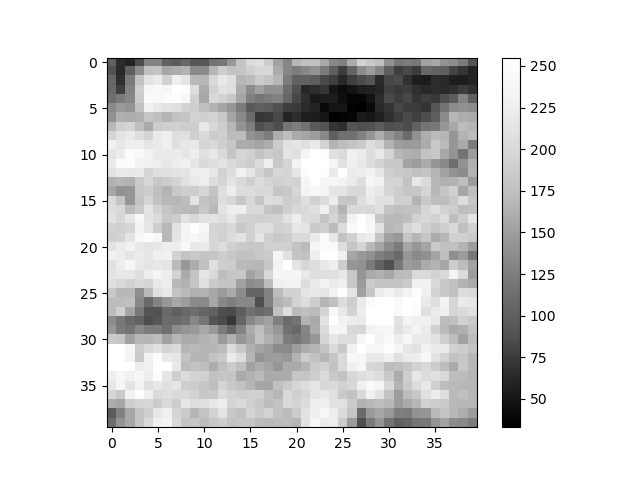
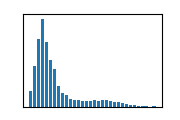

In [10]:
cropped_image